In [1]:
import numpy as np
import cv2

In [2]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [3]:
# with_mask = with_mask.reshape(200,50 * 50 * 3)
# without_mask = without_mask.reshape(200, 50 * 50 * 3)

In [4]:
with_mask.shape

(400, 50, 50, 3)

In [5]:
without_mask.shape

(400, 50, 50, 3)

In [6]:
X = np.r_[with_mask, without_mask]

In [7]:
labels = np.zeros((X.shape[0],1))

In [8]:
labels[400:,:] = 1.0

In [9]:
names = {0 : 'Mask', 1 : 'No Mask'}

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.binary_crossentropy,
             metrics=['accuracy'])
history = model.fit(X,labels,epochs=10)

Train on 800 samples
Epoch 1/10
800/800 [==============================] - 2s 3ms/sample - loss: 9.1200 - accuracy: 0.6712
Epoch 2/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.3531 - accuracy: 0.8325
Epoch 3/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.2147 - accuracy: 0.8938
Epoch 4/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.1341 - accuracy: 0.9337
Epoch 5/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.1182 - accuracy: 0.9400
Epoch 6/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.1080 - accuracy: 0.9400
Epoch 7/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.0959 - accuracy: 0.9550
Epoch 8/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.0838 - accuracy: 0.9588
Epoch 9/10
800/800 [==============================] - 2s 2ms/sample - loss: 0.0724 - accuracy: 0.9650
Epoch 10/10
800/800 [==============================] - 2s 2ms

In [16]:
import matplotlib.pyplot as plt

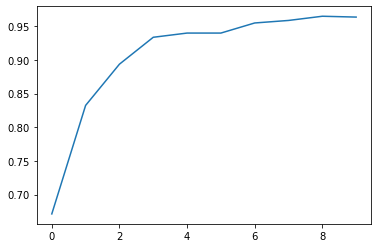

In [17]:
plt.plot(history.history['accuracy'])
plt.show()

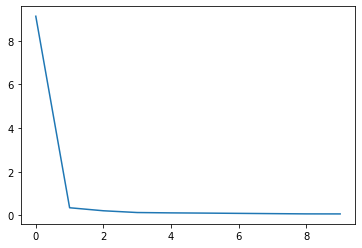

In [18]:
plt.plot(history.history['loss'])
plt.show()

In [19]:
# labels

In [22]:
haar_data = cv2.CascadeClassifier('data.xml')
capture = cv2.VideoCapture(1)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            face = np.reshape(face, (1,50,50,3))
            pred = model.predict(face)
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (244,250,250), 2)
            print(n)
        cv2.imshow('result',img)
        #27 - ASCII of Escape
        if cv2.waitKey(2) == 27:
            break
    else:
        print("Camera not working")

capture.release()
cv2.destroyAllWindows()

Mask
Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask